<a href='https://github.com/SeWonKwon' ><div> <img src ='https://slid-capture.s3.ap-northeast-2.amazonaws.com/public/image_upload/6556674324ed41a289a354258718280d/964e5a8b-75ad-41fc-ae75-0ca66d06fbc7.png' align='left' /> </div></a>



In [1]:
import pandas as pd
import numpy as np
pd.__version__

'1.1.3'

# 인덱싱(Indexing)

* 인덱싱은 필요한 곳만 순서를 이용해서 가져오는 것이다. 
* 시리즈는 인덱스
* DataFrame 은 index와 column 으로 가져 온다.
    - DataFrame 에서 직접 접근은  column으로만 가능하다. 

## Series Indexing


In [2]:
s = pd.Series(['a', 'b', 'c', 'd', 'e'],
              index=[1, 3, 5, 7, 9])
s

1    a
3    b
5    c
7    d
9    e
dtype: object

In [3]:
s[1]

'a'

In [4]:
s[2:4]

5    c
7    d
dtype: object

In [5]:
s.iloc[1]

'b'

In [6]:
s.iloc[2:4]

5    c
7    d
dtype: object

## 인덱스를 재설정 하기 

In [7]:
s.reindex(range(10))

0    NaN
1      a
2    NaN
3      b
4    NaN
5      c
6    NaN
7      d
8    NaN
9      e
dtype: object

In [8]:
s.reindex(range(10), method='bfill')

0    a
1    a
2    b
3    b
4    c
5    c
6    d
7    d
8    e
9    e
dtype: object

## DataFrame 인덱싱

|사용 방법|설명|
|---|---|
|df[val]|하나의 컬럼 또는 여러 컬럼을 선택|
|df.loc[val]|라벨값으로 로우의 부분집합 선택|
|df.loc[:, val]|라벨값으로 컬럼의 부분집합 선택|
|df.loc[val1, val2]|라벨값으로 로우와 컬럼의 부분집합 선택|
|df.iloc[where]|정수 색 인으로 로우의 부분집합 선택|
|df.iloc[:, where]|정수 색인으로 컬럼의 부분집합 선택|
|df.iloc [where_i, where_j]| 정수 색인으로 로우와 컬럼의 부분집합 선택|
|df.at[label_i, label_j]|로우와 컬럼의 라벨로 단일 값 선택|
|df.iat[i, j]|로우와 컬럼의 정수 색인으로 단일 값선택|
|reindex|하나 이상의 축을 새로운 색인으로 재색인|
|get_value, set_value|로우와 컬럼의 이름으로 값 선택|

In [10]:
pop_tuple = {'서울특별시': 9720846,
             '부산광역시': 3404423,
             '인천광역시': 2947217,
             '대구광역시': 2427954,
             '대전광역시': 1471040,
             '광주광역시': 1455048}
female_tuple = {'서울특별시': 4988571,
                '부산광역시': 1735805,
                '인천광역시': 1470404,
                '대구광역시': 1229139,
                '대전광역시': 736599,
                '광주광역시': 734988}
male_tuple = {'서울특별시': 4732275,
              '부산광역시': 1668618,
              '인천광역시': 1476813,
              '대구광역시': 1198815,
              '대전광역시': 734441,
              '광주광역시': 720060}

population = pd.Series(pop_tuple)
male = pd.Series(male_tuple)
female = pd.Series(female_tuple)

korea_df = pd.DataFrame({'인구수': population,
                         '남자인구수':male,
                         '여자인구수':female })
korea_df

,인구수,남자인구수,여자인구수
서울특별시,9720846,4732275,4988571
부산광역시,3404423,1668618,1735805
인천광역시,2947217,1476813,1470404
대구광역시,2427954,1198815,1229139
대전광역시,1471040,734441,736599
광주광역시,1455048,720060,734988


### DataFrame 직접 접근

In [14]:
korea_df['남자인구수']

서울특별시    4732275
부산광역시    1668618
인천광역시    1476813
대구광역시    1198815
대전광역시     734441
광주광역시     720060
Name: 남자인구수, dtype: int64

In [13]:
korea_df.남자인구수

서울특별시    4732275
부산광역시    1668618
인천광역시    1476813
대구광역시    1198815
대전광역시     734441
광주광역시     720060
Name: 남자인구수, dtype: int64

###  DataFrame 새로운 컬럼 생성 by 직접 접근

In [16]:
korea_df['남여비율'] = (korea_df['남자인구수'] * 100 / korea_df['여자인구수'])
korea_df['남여비율']

서울특별시     94.862336
부산광역시     96.129346
인천광역시    100.435867
대구광역시     97.532907
대전광역시     99.707032
광주광역시     97.968946
Name: 남여비율, dtype: float64


### df.values -> array 값으로 환원

In [18]:
korea_df.values

array([[9.72084600e+06, 4.73227500e+06, 4.98857100e+06, 9.48623363e+01],
       [3.40442300e+06, 1.66861800e+06, 1.73580500e+06, 9.61293463e+01],
       [2.94721700e+06, 1.47681300e+06, 1.47040400e+06, 1.00435867e+02],
       [2.42795400e+06, 1.19881500e+06, 1.22913900e+06, 9.75329072e+01],
       [1.47104000e+06, 7.34441000e+05, 7.36599000e+05, 9.97070319e+01],
       [1.45504800e+06, 7.20060000e+05, 7.34988000e+05, 9.79689464e+01]])

In [19]:
korea_df.values[0]

array([9.72084600e+06, 4.73227500e+06, 4.98857100e+06, 9.48623363e+01])

###  df.loc :  column명으로 접근

In [20]:
korea_df.loc[:'인천광역시', :'남자인구수']

,인구수,남자인구수
서울특별시,9720846,4732275
부산광역시,3404423,1668618
인천광역시,2947217,1476813


### df.loc : bool로 접근하기
* bool은 인덱스에 접근해서 True 이면 출력, False 이면 미출력

In [21]:
korea_df.여자인구수 > 1000000

서울특별시     True
부산광역시     True
인천광역시     True
대구광역시     True
대전광역시    False
광주광역시    False
Name: 여자인구수, dtype: bool

In [22]:
korea_df.loc[(korea_df.여자인구수 > 1000000)]

,인구수,남자인구수,여자인구수,남여비율
서울특별시,9720846,4732275,4988571,94.862336
부산광역시,3404423,1668618,1735805,96.129346
인천광역시,2947217,1476813,1470404,100.435867
대구광역시,2427954,1198815,1229139,97.532907


In [24]:
korea_df.loc[(korea_df.여자인구수 > 1000000), ['인구수','여자인구수']]

,인구수,여자인구수
서울특별시,9720846,4988571
부산광역시,3404423,1735805
인천광역시,2947217,1470404
대구광역시,2427954,1229139


In [25]:
korea_df.loc[ (korea_df.인구수 > 2500000) & (korea_df.남여비율 > 100)]

,인구수,남자인구수,여자인구수,남여비율
인천광역시,2947217,1476813,1470404,100.435867


### df.iloc index 번호로 접근하기 

In [26]:
korea_df.iloc[:3, :2]

,인구수,남자인구수
서울특별시,9720846,4732275
부산광역시,3404423,1668618
인천광역시,2947217,1476813


In [28]:
# korea_df.iloc[(korea_df.여자인구수 > 1000000),:2]
# 불가능하다

###  인덱스 재설정 활용해 보기

In [36]:
new_idx = korea_df.index.to_list() + ['제주특별시']
new_idx

['서울특별시', '부산광역시', '인천광역시', '대구광역시', '대전광역시', '광주광역시', '제주특별시']

In [37]:
korea_df.reindex(new_idx)

,인구수,남자인구수,여자인구수,남여비율
서울특별시,9720846.0,4732275.0,4988571.0,94.862336
부산광역시,3404423.0,1668618.0,1735805.0,96.129346
인천광역시,2947217.0,1476813.0,1470404.0,100.435867
대구광역시,2427954.0,1198815.0,1229139.0,97.532907
대전광역시,1471040.0,734441.0,736599.0,99.707032
광주광역시,1455048.0,720060.0,734988.0,97.968946
제주특별시,NaN,NaN,NaN,NaN


#### 시계열에서 빠진 날짜 찾아서 NaN 입력하기

현재 평일로만 이루어진 자료를 아래처럼 만들어보자. 

In [42]:
df = pd.DataFrame(np.random.randn(8,2), columns=['A','B'], 
                  index=pd.date_range('2021-06-10',periods=8, freq='B'))
df

,A,B
2021-06-10,-1.272146,0.056777
2021-06-11,0.310978,-1.191011
2021-06-14,1.025934,0.517281
2021-06-15,0.470734,1.029334
2021-06-16,-0.306841,-0.453886
2021-06-17,-1.654462,0.570751
2021-06-18,0.442192,-2.321125
2021-06-21,-0.229371,-0.612941


나중에 주말도 조사해야 해서 주말도 추가하게 되었다. 
철수는 평일만인지 몰랐기 때문에 우선 널값이 들어가더라도    
조사를 해보고 싶어해서 인덱스를 아래와 같이 재조정 하게 된다. 

In [43]:
df.reindex(pd.date_range('2021-06-10', periods=15, freq='D'))

,A,B
2021-06-10,-1.272146,0.056777
2021-06-11,0.310978,-1.191011
2021-06-12,NaN,NaN
2021-06-13,NaN,NaN
2021-06-14,1.025934,0.517281
2021-06-15,0.470734,1.029334
2021-06-16,-0.306841,-0.453886
2021-06-17,-1.654462,0.570751
2021-06-18,0.442192,-2.321125
2021-06-19,NaN,NaN


### 다중 인덱싱(Multi Indexing)

* 1차원의 Series와 2차원의 DataFrame 객체를 넘어 3차원, 4차원 이상의 고차원 데이터 처리
* 단일 인덱스 내에 여러 인덱스를 포함하는 다중 인덱싱

In [99]:
idx_tuples = [('서울특별시', 2010), ('서울특별시', 2020),
               ('부산광역시', 2010), ('부산광역시', 2020),
               ('인천광역시', 2010), ('인천광역시', 2020),
               ('대구광역시', 2010), ('대구광역시', 2020),
               ('대전광역시', 2010), ('대전광역시', 2020),
               ('광주광역시', 2010), ('광주광역시', 2020)]
idx_tuples

[('서울특별시', 2010),
 ('서울특별시', 2020),
 ('부산광역시', 2010),
 ('부산광역시', 2020),
 ('인천광역시', 2010),
 ('인천광역시', 2020),
 ('대구광역시', 2010),
 ('대구광역시', 2020),
 ('대전광역시', 2010),
 ('대전광역시', 2020),
 ('광주광역시', 2010),
 ('광주광역시', 2020)]

또는

In [100]:
idx_tuples = pd.MultiIndex.from_product([['서울특별시', '부산광역시',
                                         '인천광역시', '대구광역시',
                                         '대전광역시','광주광역시'],[2010,2020]])
idx_tuples

MultiIndex([('서울특별시', 2010),
            ('서울특별시', 2020),
            ('부산광역시', 2010),
            ('부산광역시', 2020),
            ('인천광역시', 2010),
            ('인천광역시', 2020),
            ('대구광역시', 2010),
            ('대구광역시', 2020),
            ('대전광역시', 2010),
            ('대전광역시', 2020),
            ('광주광역시', 2010),
            ('광주광역시', 2020)],
           )

In [101]:
pop_tuples = [10312545, 9728046,
              2567910, 3434423,
              2758296, 2947217,
              2511676, 2427954,
              1503664, 1471040,
              1454634, 1455048]

population = pd.Series(pop_tuples, index=idx_tuples)
population

서울특별시  2010    10312545
       2020     9728046
부산광역시  2010     2567910
       2020     3434423
인천광역시  2010     2758296
       2020     2947217
대구광역시  2010     2511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
광주광역시  2010     1454634
       2020     1455048
dtype: int64

In [102]:
population.index

MultiIndex([('서울특별시', 2010),
            ('서울특별시', 2020),
            ('부산광역시', 2010),
            ('부산광역시', 2020),
            ('인천광역시', 2010),
            ('인천광역시', 2020),
            ('대구광역시', 2010),
            ('대구광역시', 2020),
            ('대전광역시', 2010),
            ('대전광역시', 2020),
            ('광주광역시', 2010),
            ('광주광역시', 2020)],
           )

In [103]:
population[:, 2010]

서울특별시    10312545
부산광역시     2567910
인천광역시     2758296
대구광역시     2511676
대전광역시     1503664
광주광역시     1454634
dtype: int64

In [104]:
population['대전광역시', :]

2010    1503664
2020    1471040
dtype: int64

In [106]:
population['서울특별시', 2010]

10312545

In [107]:
population

서울특별시  2010    10312545
       2020     9728046
부산광역시  2010     2567910
       2020     3434423
인천광역시  2010     2758296
       2020     2947217
대구광역시  2010     2511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
광주광역시  2010     1454634
       2020     1455048
dtype: int64

###  stack & unstack

#### stack()

<div> 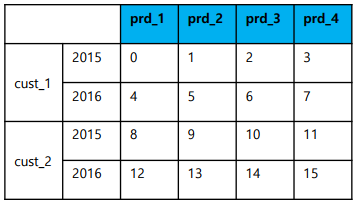 </div>

* column을 index로 쌓아 올린다. 

<div> 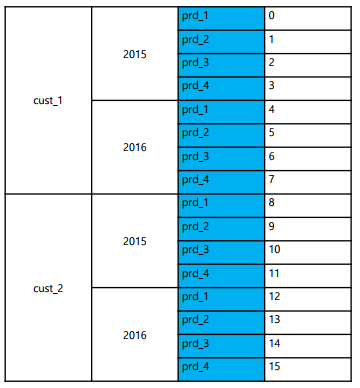 </div>

####  unstack()
<div> 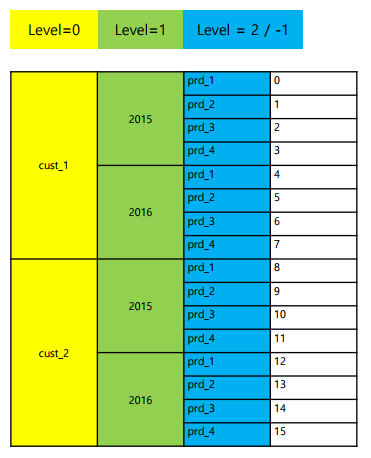 </div>

`df.unstack(level=i)`

<div> 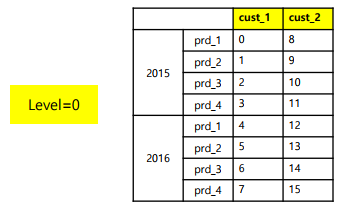 </div>

<div> 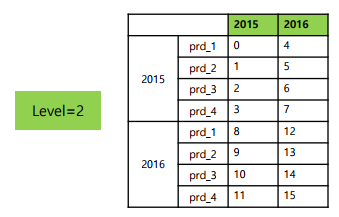 </div>

<div> 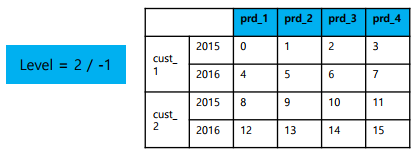 </div>

In [108]:
korea_mdf = population.unstack() # 멀티 인덱스를 풀려고
korea_mdf

,2010,2020
광주광역시,1454634,1455048
대구광역시,2511676,2427954
대전광역시,1503664,1471040
부산광역시,2567910,3434423
서울특별시,10312545,9728046
인천광역시,2758296,2947217


In [109]:
korea_mdf.stack()

광주광역시  2010     1454634
       2020     1455048
대구광역시  2010     2511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
부산광역시  2010     2567910
       2020     3434423
서울특별시  2010    10312545
       2020     9728046
인천광역시  2010     2758296
       2020     2947217
dtype: int64

In [110]:
male_tuples = [5111259, 4732275,
              1773170, 1668618,
              1390356, 1476813,
              1255245, 1198815,
              753648, 734441,
              721780, 720060]
  
male_tuple

{'서울특별시': 4732275,
 '부산광역시': 1668618,
 '인천광역시': 1476813,
 '대구광역시': 1198815,
 '대전광역시': 734441,
 '광주광역시': 720060}

In [111]:
korea_mdf = pd.DataFrame({'총인구수': population,
                          '남자인구수': male_tuples})
korea_mdf

총인구수    남자인구수
서울특별시 2010  10312545  5111259
      2020   9728046  4732275
부산광역시 2010   2567910  1773170
      2020   3434423  1668618
인천광역시 2010   2758296  1390356
      2020   2947217  1476813
대구광역시 2010   2511676  1255245
      2020   2427954  1198815
대전광역시 2010   1503664   753648
      2020   1471040   734441
광주광역시 2010   1454634   721780
      2020   1455048   720060

In [65]:
female_tuples = [5201286, 4988571,
                 1794740, 1735805,
                 1367940, 1470404,
                 1256431, 1229139,
                 750016, 736599,
                 732856, 734988]
female_tuples

[5201286,
 4988571,
 1794740,
 1735805,
 1367940,
 1470404,
 1256431,
 1229139,
 750016,
 736599,
 732856,
 734988]

In [66]:
korea_mdf = pd.DataFrame({'총인구수': population,
                          '남자인구수': male_tuples,
                          '여자인구수': female_tuples})
korea_mdf

총인구수    남자인구수    여자인구수
서울특별시 2010  10312545  5111259  5201286
      2020   9728046  4732275  4988571
부산광역시 2010   2567910  1773170  1794740
      2020   3434423  1668618  1735805
인천광역시 2010   2758296  1390356  1367940
      2020   2947217  1476813  1470404
대구광역시 2010   2511676  1255245  1256431
      2020   2427954  1198815  1229139
대전광역시 2010   1503664   753648   750016
      2020   1471040   734441   736599
광주광역시 2010   1454634   721780   732856
      2020   1455048   720060   734988

In [67]:
ratio = korea_mdf['남자인구수'] * 100 / korea_mdf['여자인구수']
ratio

서울특별시  2010     98.269140
       2020     94.862336
부산광역시  2010     98.798155
       2020     96.129346
인천광역시  2010    101.638668
       2020    100.435867
대구광역시  2010     99.905606
       2020     97.532907
대전광역시  2010    100.484256
       2020     99.707032
광주광역시  2010     98.488653
       2020     97.968946
dtype: float64

In [68]:
ratio.unstack()

,2010,2020
광주광역시,98.488653,97.968946
대구광역시,99.905606,97.532907
대전광역시,100.484256,99.707032
부산광역시,98.798155,96.129346
서울특별시,98.269140,94.862336
인천광역시,101.638668,100.435867


In [69]:
korea_mdf = pd.DataFrame({'총인구수': population,
                          '남자인구수': male_tuples,
                          '여자인구수': female_tuples,
                          '남여비율': ratio})
korea_mdf

총인구수    남자인구수    여자인구수        남여비율
서울특별시 2010  10312545  5111259  5201286   98.269140
      2020   9728046  4732275  4988571   94.862336
부산광역시 2010   2567910  1773170  1794740   98.798155
      2020   3434423  1668618  1735805   96.129346
인천광역시 2010   2758296  1390356  1367940  101.638668
      2020   2947217  1476813  1470404  100.435867
대구광역시 2010   2511676  1255245  1256431   99.905606
      2020   2427954  1198815  1229139   97.532907
대전광역시 2010   1503664   753648   750016  100.484256
      2020   1471040   734441   736599   99.707032
광주광역시 2010   1454634   721780   732856   98.488653
      2020   1455048   720060   734988   97.968946

### 다중 인덱스 생성

In [112]:
df = pd.DataFrame(np.random.rand(6, 3),
                 index=[['a','a','b','b','c','c'],[1,2,1,2,1,2]],
                  columns=['c1', 'c2', 'c3'])
df

c1        c2        c3
a 1  0.148010  0.251459  0.306659
  2  0.408378  0.640083  0.020035
b 1  0.502007  0.397937  0.572740
  2  0.563197  0.732491  0.318434
c 1  0.318702  0.272307  0.527019
  2  0.478020  0.744418  0.000335

In [113]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b', 'c', 'c'], [1, 2, 1, 2, 1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [114]:
pd.MultiIndex.from_tuples([('a', 1), ('a',2), ('b', 1), ('b', 2), ('c', 1), ('c', 2)])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [115]:
pd.MultiIndex.from_product([['a','b','c'], [1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [116]:
pd.MultiIndex(levels = [['a', 'b', 'c'], [1, 2]],
              codes = [[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [117]:
population

서울특별시  2010    10312545
       2020     9728046
부산광역시  2010     2567910
       2020     3434423
인천광역시  2010     2758296
       2020     2947217
대구광역시  2010     2511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
광주광역시  2010     1454634
       2020     1455048
dtype: int64

#### index.names

In [118]:
population.index.names=['행정구역', '년도']
population

행정구역   년도  
서울특별시  2010    10312545
       2020     9728046
부산광역시  2010     2567910
       2020     3434423
인천광역시  2010     2758296
       2020     2947217
대구광역시  2010     2511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
광주광역시  2010     1454634
       2020     1455048
dtype: int64

In [76]:
idx = pd.MultiIndex.from_product([['a', 'b', 'c'], [1, 2]],
                                 names=['name1', 'name2'])
cols = pd.MultiIndex.from_product([['c1', 'c2', 'c3'], [1, 2]],
                                   names = ['col_name1', 'col_names2'])
data = np.round(np.random.randn(6, 6), 2)
mdf = pd.DataFrame(data, index=idx, columns=cols)
mdf

col_name1      c1          c2          c3      
col_names2      1     2     1     2     1     2
name1 name2                                    
a     1     -0.18  0.73  0.82 -0.08 -0.49  0.21
      2      0.42  1.33  0.51  0.37 -0.22 -0.33
b     1     -0.76 -0.80 -0.63 -0.02  0.92  0.31
      2      0.67 -0.31  0.10 -0.74  2.54  0.33
c     1     -1.40 -1.26  0.18  1.11 -0.24 -1.69
      2      1.40 -0.13 -1.35  0.15 -1.42  0.14

In [77]:
mdf['c2']

col_names2      1     2
name1 name2            
a     1      0.82 -0.08
      2      0.51  0.37
b     1     -0.63 -0.02
      2      0.10 -0.74
c     1      0.18  1.11
      2     -1.35  0.15

In [78]:
mdf['c2'][2]

name1  name2
a      1       -0.08
       2        0.37
b      1       -0.02
       2       -0.74
c      1        1.11
       2        0.15
Name: 2, dtype: float64

### 인덱싱 및 슬라이싱

In [119]:
population

행정구역   년도  
서울특별시  2010    10312545
       2020     9728046
부산광역시  2010     2567910
       2020     3434423
인천광역시  2010     2758296
       2020     2947217
대구광역시  2010     2511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
광주광역시  2010     1454634
       2020     1455048
dtype: int64

In [120]:
population['인천광역시', 2010]

2758296

In [121]:
population[:, 2010]

행정구역
서울특별시    10312545
부산광역시     2567910
인천광역시     2758296
대구광역시     2511676
대전광역시     1503664
광주광역시     1454634
dtype: int64

In [122]:
population[population > 3000000]

행정구역   년도  
서울특별시  2010    10312545
       2020     9728046
부산광역시  2020     3434423
dtype: int64

In [123]:
population[['대구광역시', '대전광역시']]

행정구역   년도  
대구광역시  2010    2511676
       2020    2427954
대전광역시  2010    1503664
       2020    1471040
dtype: int64

In [124]:
mdf['c2',1]

name1  name2
a      1        0.82
       2        0.51
b      1       -0.63
       2        0.10
c      1        0.18
       2       -1.35
Name: (c2, 1), dtype: float64

In [125]:
mdf.loc[:, ('c2', 1)]

name1  name2
a      1        0.82
       2        0.51
b      1       -0.63
       2        0.10
c      1        0.18
       2       -1.35
Name: (c2, 1), dtype: float64

In [126]:
idx_slice = pd.IndexSlice
mdf.loc[idx_slice[:, 2], idx_slice[:, 2]]

,col_name1,c1,c2,c3
,col_names2,2,2,2
name1,name2,,,
a,2,1.33,0.37,-0.33
b,2,-0.31,-0.74,0.33
c,2,-0.13,0.15,0.14


### 다중 인덱스 재정렬

In [127]:
idx

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           names=['name1', 'name2'])

In [128]:
korea_mdf

총인구수    남자인구수
행정구역  년도                     
서울특별시 2010  10312545  5111259
      2020   9728046  4732275
부산광역시 2010   2567910  1773170
      2020   3434423  1668618
인천광역시 2010   2758296  1390356
      2020   2947217  1476813
대구광역시 2010   2511676  1255245
      2020   2427954  1198815
대전광역시 2010   1503664   753648
      2020   1471040   734441
광주광역시 2010   1454634   721780
      2020   1455048   720060

In [129]:
# korea_mdf['서울특별시':'인천광역시'] #UnsortedIndexError

korea_mdf = korea_mdf.sort_index() # 위와 비교해 보면 인덱스가 가나다 순으로 sorted 됨
korea_mdf

총인구수    남자인구수
행정구역  년도                     
광주광역시 2010   1454634   721780
      2020   1455048   720060
대구광역시 2010   2511676  1255245
      2020   2427954  1198815
대전광역시 2010   1503664   753648
      2020   1471040   734441
부산광역시 2010   2567910  1773170
      2020   3434423  1668618
서울특별시 2010  10312545  5111259
      2020   9728046  4732275
인천광역시 2010   2758296  1390356
      2020   2947217  1476813

In [130]:
korea_mdf['서울특별시':'인천광역시']

총인구수    남자인구수
행정구역  년도                     
서울특별시 2010  10312545  5111259
      2020   9728046  4732275
인천광역시 2010   2758296  1390356
      2020   2947217  1476813

In [131]:
korea_mdf.index

MultiIndex([('광주광역시', 2010),
            ('광주광역시', 2020),
            ('대구광역시', 2010),
            ('대구광역시', 2020),
            ('대전광역시', 2010),
            ('대전광역시', 2020),
            ('부산광역시', 2010),
            ('부산광역시', 2020),
            ('서울특별시', 2010),
            ('서울특별시', 2020),
            ('인천광역시', 2010),
            ('인천광역시', 2020)],
           names=['행정구역', '년도'])

In [132]:
korea_mdf.unstack(level=0)

총인구수                                                 남자인구수                                            
행정구역    광주광역시    대구광역시    대전광역시    부산광역시     서울특별시    인천광역시   광주광역시    대구광역시   대전광역시    부산광역시    서울특별시    인천광역시
년도                                                                                                             
2010  1454634  2511676  1503664  2567910  10312545  2758296  721780  1255245  753648  1773170  5111259  1390356
2020  1455048  2427954  1471040  3434423   9728046  2947217  720060  1198815  734441  1668618  4732275  1476813

In [133]:
korea_mdf.unstack(level=1)

총인구수             남자인구수         
년도         2010     2020     2010     2020
행정구역                                      
광주광역시   1454634  1455048   721780   720060
대구광역시   2511676  2427954  1255245  1198815
대전광역시   1503664  1471040   753648   734441
부산광역시   2567910  3434423  1773170  1668618
서울특별시  10312545  9728046  5111259  4732275
인천광역시   2758296  2947217  1390356  1476813

In [134]:
korea_mdf.stack()

행정구역   년도         
광주광역시  2010  총인구수      1454634
             남자인구수      721780
       2020  총인구수      1455048
             남자인구수      720060
대구광역시  2010  총인구수      2511676
             남자인구수     1255245
       2020  총인구수      2427954
             남자인구수     1198815
대전광역시  2010  총인구수      1503664
             남자인구수      753648
       2020  총인구수      1471040
             남자인구수      734441
부산광역시  2010  총인구수      2567910
             남자인구수     1773170
       2020  총인구수      3434423
             남자인구수     1668618
서울특별시  2010  총인구수     10312545
             남자인구수     5111259
       2020  총인구수      9728046
             남자인구수     4732275
인천광역시  2010  총인구수      2758296
             남자인구수     1390356
       2020  총인구수      2947217
             남자인구수     1476813
dtype: int64

In [135]:
korea_mdf

총인구수    남자인구수
행정구역  년도                     
광주광역시 2010   1454634   721780
      2020   1455048   720060
대구광역시 2010   2511676  1255245
      2020   2427954  1198815
대전광역시 2010   1503664   753648
      2020   1471040   734441
부산광역시 2010   2567910  1773170
      2020   3434423  1668618
서울특별시 2010  10312545  5111259
      2020   9728046  4732275
인천광역시 2010   2758296  1390356
      2020   2947217  1476813

In [137]:
idx_flat = korea_mdf.reset_index(level=0)
idx_flat

,행정구역,총인구수,남자인구수
년도,,,
2010,광주광역시,1454634,721780
2020,광주광역시,1455048,720060
2010,대구광역시,2511676,1255245
2020,대구광역시,2427954,1198815
2010,대전광역시,1503664,753648
2020,대전광역시,1471040,734441
2010,부산광역시,2567910,1773170
2020,부산광역시,3434423,1668618
2010,서울특별시,10312545,5111259


In [138]:
idx_flat = korea_mdf.reset_index(level=(0, 1))
idx_flat

,행정구역,년도,총인구수,남자인구수
0,광주광역시,2010,1454634,721780
1,광주광역시,2020,1455048,720060
2,대구광역시,2010,2511676,1255245
3,대구광역시,2020,2427954,1198815
4,대전광역시,2010,1503664,753648
5,대전광역시,2020,1471040,734441
6,부산광역시,2010,2567910,1773170
7,부산광역시,2020,3434423,1668618
8,서울특별시,2010,10312545,5111259
9,서울특별시,2020,9728046,4732275


In [139]:
idx_flat.set_index(['행정구역', '년도'])

총인구수    남자인구수
행정구역  년도                     
광주광역시 2010   1454634   721780
      2020   1455048   720060
대구광역시 2010   2511676  1255245
      2020   2427954  1198815
대전광역시 2010   1503664   753648
      2020   1471040   734441
부산광역시 2010   2567910  1773170
      2020   3434423  1668618
서울특별시 2010  10312545  5111259
      2020   9728046  4732275
인천광역시 2010   2758296  1390356
      2020   2947217  1476813

출처: 
* <a href='https://github.com/SeWonKwon' ><div> <img src ='https://slid-capture.s3.ap-northeast-2.amazonaws.com/public/image_upload/6556674324ed41a289a354258718280d/964e5a8b-75ad-41fc-ae75-0ca66d06fbc7.png' align='left' /> </div></a>


<br>


* [이수안컴퓨터연구소](https://www.youtube.com/channel/UCFfALXX0DOx7zv6VeR5U_Bg)
* https://github.com/minsuk-heo/pandas